# KNN classification on the digits dataset

## Table of contents:
- [1 Load data](#1-load)
- [2 Explore data](#2-explore)
    * [2.1 Assign the greyscale values ](#2-explore-2-1)
    * [2.2 Flatten the matrix](#2-explore-2-2)
- [3 Build the KNN model](#3-build)
    * [3.1 Step 1: Split into test set and training set](#3-build-3-1)
    * [3.2 Step 2: Create a k-Nearest Neighbor classifier ](#3-build-3-2)
    * [3.3 Step 3: Fit the model from the training data](#3-build-3-3)
    * [3.4 Step 4: Predict on unseen data](#3-build-3-4)
    * [3.5 Step 5: Create a confusion matrix ](#3-build-3-5)
- [4 Visualise the prediction](#4-visualise)


# 1 Load data <a name="1-load"></a>

First as usual we will import all the packages we’ll use in this activity. Though we can import any module at any step, it is generally considered a better practice to do it at the top (see [Python documentation](https://www.python.org/dev/peps/pep-0008/#imports)). Run the code below.  

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

To retrieve our data, let’s first import the digits dataset using the [load_digits()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) function. Run the code below.

In [2]:
digits_data = load_digits(as_frame=True)
print(digits_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# 2 Exploring Data <a name="2-explore"></a>

## 2.1 Assign the greyscale values <a name="2-explore-2-1"></a>

We will now set the default colormap to be reversed greyscale with the [set_cmap()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.set_cmap.html) function. Reversed means that high values will be black and low values white. Run the code below.

In [3]:
plt.set_cmap('gray_r')

<Figure size 432x288 with 0 Axes>

Let’s see what the first image looks like  

In [4]:
digits_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

That’s the numerical representation of the image, a two-dimensional array, probably not very meaningful for the human eye. But that’s a close representation of the way the model will “see” it. 

Now, let’s transform it into a more human friendly form, using the [matshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html?highlight=matshow) function. You may recall that previously we used a different function (imshow) to generate the plots in the activity with k-means, Both methods can be used interchangeably for this purpose. Run the code below.  

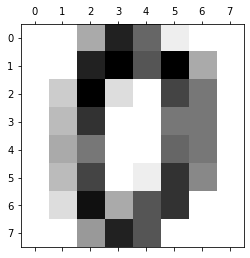

In [5]:
plt.matshow(digits_data.images[0])
plt.show()

**Think** 🤔 Does the image and the matrix output above match?  

>  You should see matching values between the image and the matrix. You can cross reference a completely black (a value of 15) or a completely white (a value of 0) cell to check.

Now let’s step it up a bit and plot the first 16 images. Run the code below. 

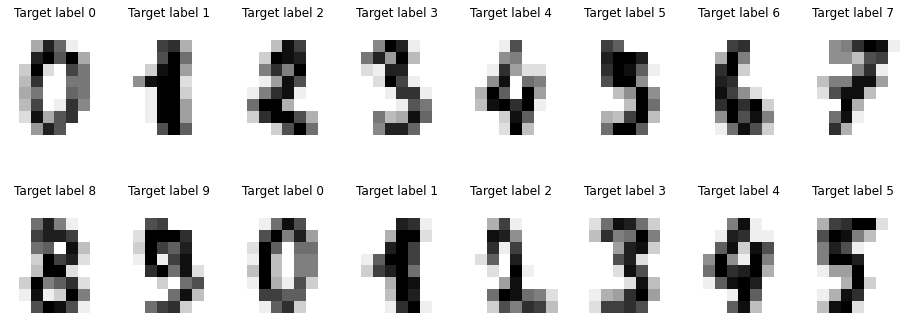

In [6]:
# create a figure with subplots
_, axes = plt.subplots(nrows=2, ncols=8, figsize=(16, 6))

# Iterate over several iterables in parallel using zip, by default stops when the shortest iterable ends
# since we defined 2 rows, axes will be a 2 dimensional array, to make it easier to iterate over it we use ndarray.flatten()
for ax, image, label in zip(axes.flatten(), digits_data.images, digits_data.target):
    # turn off the axis for the plot
    ax.set_axis_off()
    # Display data as an image
    ax.matshow(image)
    # set the title for subplot
    ax.set_title(f'Target label {label}')

plt.show()

## 2.2 Flatten the matrix <a name="2-explore-2-2"></a>

The k-nearest neighbours classifier expects a features vector (one dimensional array), but images are usually represented with a matrix (two-dimensional arrays). To “flatten” it into a single dimensional array, we could use [numpy.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) on the array of images to reshape every 8x8 image array into a single dimensional array with a length of 64. Run the code below. 

In [7]:
digits_data.images[0].reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Note: we use an argument of -1 to specify one shape dimension and produce an array (or single row) of values. The video below explains how reshape() “flattens” the two-dimensional array into a one dimensional array. 

In [8]:
%%HTML 
<video width="80%" controls>  
    <source src="./flatten.mp4" type="video/mp4">  
</video> 

Since we’re using an sklearn “toy”  dataset, we have it already under the data attribute. 

In [9]:
digits_data.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


# 3 Build the KNN model  <a name="3-build"></a>

Now that the number of dimensions was reduced from two to one, this brings us to step five of the data science process: model building.

Before passing all the images data into the KNN classifier, we first need to split the data into a train set and a test set. All the training samples with their labels (i.e. the actual digit it represents) will be stored by the model in the memory. Next we will pass the test samples (only features, no labels) to the model and predict their labels, that is, given a features vector of an image the model will predict the label (digit) based on similarity to the samples in the training set. We can then generate a confusion matrix between the predicted labels and the actual labels to evaluate the performance of the model on the test set.

## 3.1 Step 1: Split into test set and training set <a name="3-build-3-1"></a>

We now need to create our two datasets. First we will split the whole dataset of digits using the sklearn [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. We will use 80% of the data for training and 20% for evaluation. Note that explicitly setting the random_state parameter will ensure that we can later reproduce the result, as especially with small datasets the random splits of the data may affect the result (to reduce this effect we can apply an approach known as k-fold cross-validation). Run the code below.  

In [10]:
# We first pass the features data of all samples, then the target labels of all samples
# returned from the function are first the data split into 80%-20% and then the labels also 80%-20%
X_train, X_test, y_train, y_test = train_test_split(digits_data.data, digits_data.target, test_size=0.2, random_state=0)

The notations of X and y are common in machine learning, uppercase X is usually used to represent the matrix (rows and columns) of features and y represents a vector (single column) of labels. In our example we use X_train to represent the features matrix of the train samples and y_train to represent their corresponding labels. Similarly, X_test holds the features of the test set and y_test their corresponding labels. 

## 3.2 Step 2: Create a k-Nearest Neighbor classifier  <a name="3-build-3-2"></a>

First instantiate a KNN classifier from sklearn using the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. In our experiment we will set k=3 (n_neighbors), but you are strongly encouraged to vary the value of k after completion of this activity and run the code again to see how it affects the result. 

In [11]:
clf = KNeighborsClassifier(3)
clf

KNeighborsClassifier(n_neighbors=3)

## 3.3 Step 3: Fit the model from the training data  <a name="3-build-3-3"></a>

Now we need to train the model with the training data set.

In [12]:
clf.fit(X_train, y_train)
clf

KNeighborsClassifier(n_neighbors=3)

## 3.4 Step 4: Predict on unseen data  <a name="3-build-3-4"></a>

After the model was trained, we’ll use it to predict the labels of the samples in the test dataset. 

In [13]:
y_pred = clf.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 3, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 3, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 2, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

## 3.5 Step 5: Create a confusion matrix  <a name="3-build-3-5"></a>

We’ll now create the confusion matrix to evaluate the model. You’ll recall that a confusion matrix is a two-dimensional array (table) that shows how often the class (digit) predicted was the correct class. Run the code below. 

In [14]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41]])

We can also generate a plot of the confusion matrix to make it easier to read. Run the code below. 

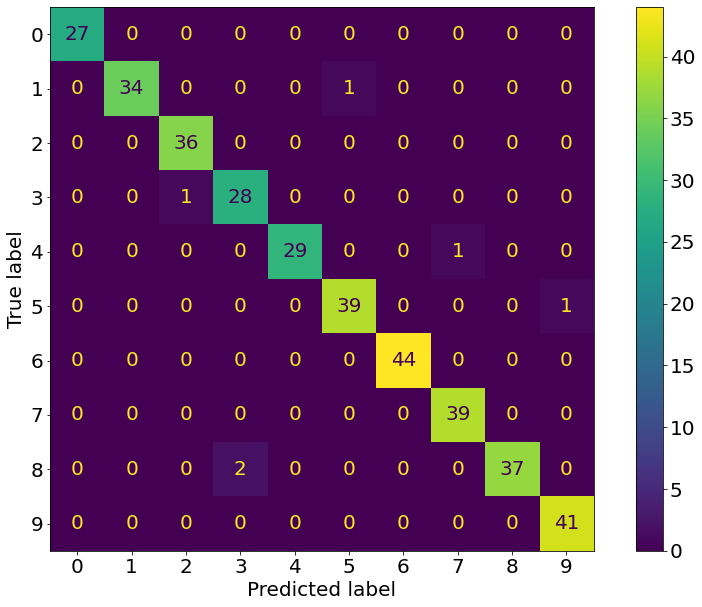

In [15]:
plt.rcParams.update({'font.size': 20}) # set font size in all plots from here
fig, ax = plt.subplots(figsize=(15, 10))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, ax=ax)

It is shown here that the model predicted that 37 (36+1) samples were the digit 2, 36 of these samples had actually the label 2 and one sample had the label 3. Similarly, the digit 8 was predicted correctly 37 times and incorrectly 2 times, when the model predicted it as 3. 

**Think** 🤔 Have a look at the confusion matrix above. Does it show that our predictions were generally good, generally bad, or somewhere in between?  

> In a good model, you’d expect the sum of the numbers on the main diagonal of the matrix (also known as the matrix trace) to be very high compared to the sum of all matrix entries. So, from this confusion matrix, we can deduce that for most images, the predictions are quite accurate.

# 4 Visualise the prediction <a name="4-visualise"></a>

We would now like to compare the results of our data and our predictions visually. Run the code below. 

In [16]:
images_and_predictions = list(zip(digits_data.images, clf.predict(digits_data.data)))

In [ ]:
plt.figure(figsize=(14,6))
for index, (image, prediction) in enumerate(images_and_predictions[:10], 1):
    plt.subplot(2, 5, index)
    plt.axis("off")
    plt.imshow(image, interpolation='nearest')
    plt.title('Prediction: {}'.format(prediction))
plt.show()

Examine the output above. The bottom left number is ambiguous, even to humans; is it a 5 or a 9? It’s debatable, but the algorithm thinks it’s a 9. By discerning which images were misinterpreted, we can train the model further by 

 * Labelling them with the correct number they display (assuming it was a mistake in the label), then 
 * Feeding them back into the model as a new training set (step 5 of the data science process). 

This will make the model more accurate, continuing the cycle of learn, predict and correct and, in turn, improving the accuracy of our predictions.  

<div class="warning" style='padding:0.1em; background-color:#e6ffff'>
<span>
<p style='margin:1em;'>
<b>Congratulations!</b></p>
<p style='margin:1em;'>
You’ve now completed a practical exercise using the KNN classification model. This model forms an important part of your upcoming assessment. To revise this activity, return to the Canvas page and read over the content under “What you’ll learn”.
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>